## <center>CITS5508 Lab sheet 2: Classification on Japanese Forest Data</center>

**Name: Samuel Heath**<br>
**Student number: 27125083**<br>
**Date created:** March 11th 2019<br>
**Last modified:** March 22th 2019<br>

The Lab looks at some pre-labeled data and performs supervised learning on a training set, and based on this determines how accurate of a predictor two different learning models are.


## 1. Initialisation and File I/O

Import all of the required files used in this analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the training and testing datasets
training_set = pd.read_csv('training.csv')
testing_set = pd.read_csv('testing.csv')

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162,50.818889,...,-5.594141,-20.037576,-1.007121,-4.355657,-20.996919,-0.973737,-4.597626,-18.840000,-1.570808,-4.155859
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158,12.842321,...,9.769193,4.948562,1.783671,2.352311,6.490763,0.702619,1.736712,5.251095,1.807792,1.982423
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000,7.660000,...,-53.530000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000,40.667500,...,-6.627500,-23.325000,-1.860000,-5.790000,-24.090000,-1.290000,-5.747500,-22.237500,-2.370000,-5.122500
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000,53.030000,...,-2.255000,-20.020000,-0.970000,-4.350000,-20.465000,-0.945000,-4.540000,-19.200000,-1.420000,-4.125000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000,59.920000,...,0.247500,-17.787500,-0.042500,-2.882500,-17.955000,-0.642500,-3.617500,-16.227500,-0.655000,-3.105000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000,83.320000,...,5.740000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


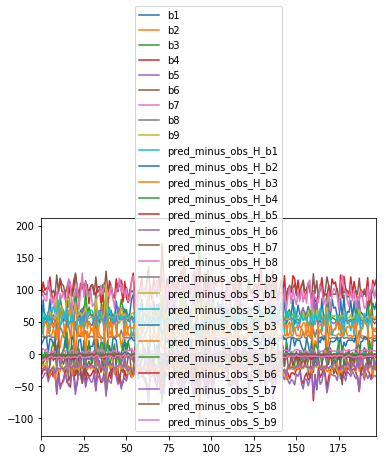

In [2]:
training_set.plot()

# Display what the raw data stored looks like
training_set.describe()

### 1.1 Comments on Data
From the description of the data it appears that the standard deviations vary quite significantly suggesting the data is not distributed similarly accross the variables.
With so many variables it is difficult to visualise all the data and hard to tell what is and what isnt important.

## 2. Remove all the unneeded columns and visualise the data
- We don't want any of the pred_ columns and so we have removed them from the data.
- We have revisualised the data after completing this

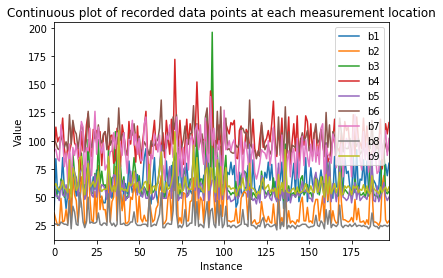

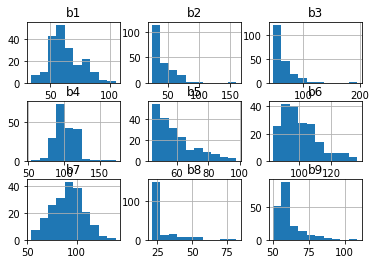


Description of the Data


,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000


In [3]:
# Remove unneeded features from the data
training_set = training_set[list(filter(lambda x: 'pred_minus' not in x, training_set.columns.get_values()))]

# Redisplay the values
ax = training_set.plot()
ax.set_xlabel("Instance")
ax.set_ylabel("Value")
plt.title("Continuous plot of recorded data points at each measurement location")
ax = training_set.hist()
plt.show()

# Describe data
print("\nDescription of the Data")
training_set.describe()

### 2.1 Comments on Data
From the line chart the features appear to have almost set ranges in which they vary between, with limited spurious data.
From the histograms of the features they all appear to be right skewed and do not follow a Gaussian Distribution.

## 3. Further Data Visualisation

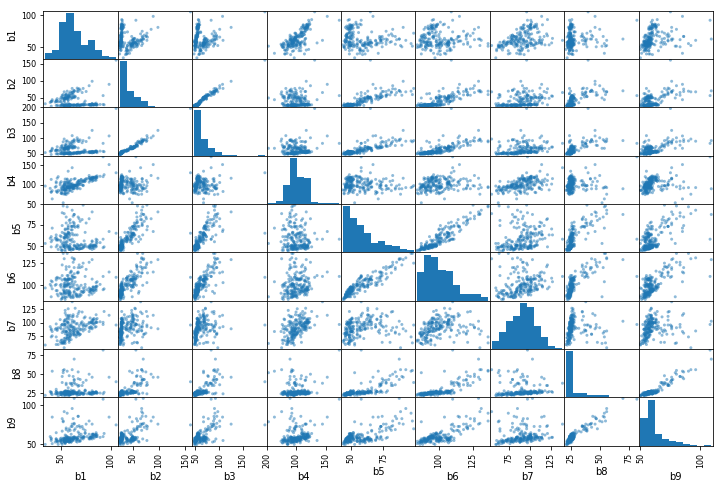

,b1,b2,b3,b4,b5,b6,b7,b8,b9
b1,1.000000,0.062016,0.152092,0.684730,-0.119768,0.005094,0.411557,0.093572,0.261696
b2,0.062016,1.000000,0.981194,0.058709,0.786532,0.741036,0.276964,0.627359,0.588224
b3,0.152092,0.981194,1.000000,0.106463,0.729293,0.708039,0.242349,0.626275,0.603003
b4,0.684730,0.058709,0.106463,1.000000,-0.109407,0.167273,0.505824,0.101474,0.217717
b5,-0.119768,0.786532,0.729293,-0.109407,1.000000,0.926318,0.204106,0.704936,0.661180
b6,0.005094,0.741036,0.708039,0.167273,0.926318,1.000000,0.252331,0.734751,0.727810
b7,0.411557,0.276964,0.242349,0.505824,0.204106,0.252331,1.000000,0.019066,0.162467
b8,0.093572,0.627359,0.626275,0.101474,0.704936,0.734751,0.019066,1.000000,0.950395
b9,0.261696,0.588224,0.603003,0.217717,0.661180,0.727810,0.162467,0.950395,1.000000


In [4]:
from pandas.plotting import scatter_matrix
vis_copy = training_set.copy()

scatter_matrix(vis_copy, figsize=(12, 8))
plt.show()
vis_copy.corr()

### 3.1 Comments on the Data
From this matrix scatter plot, many of the features appear to show highly linear relationships with one another. Visually this is particularly present with b3 and b2, b5 and b6, and b8 and b9. These correlations are further supported by the values of the correlation matrix which show all 3 of these pairs having a correlation > than 90.

class
d    54
h    48
o    37
s    59
dtype: int64


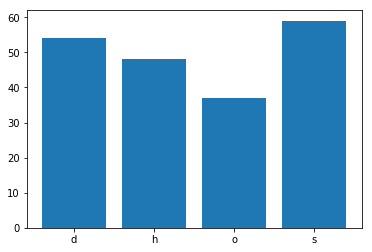

In [5]:
f

plt.show()

### 3.2 Conclusion
From the above bar graph we can see that the sizes of the grouped classes the dataset are not even with class `o` only consisting of 18.7% of the training instances whilst class `s` consists of 29.8% of the training instances. However, this difference is likely not enough to result in an imbalanced dataset, but may suggest that more data needs to be collected.

## 4. Create Training and Test Sets

In [6]:
# Generate all the feature columns
features = list(filter(lambda x: 'class' != x, training_set.columns.get_values()))

# Separate Training and Testing Features From Labels
X_train_scaled = training_set[features]
X_test_scaled = testing_set[features]
# Keep training labels in y
y_train = training_set['class']
y_test = testing_set['class']

y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

## 4.1 Data Normalisation
Convert all features to be within the same range 0-1

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Scale the Training Set excluding the 'class' column
X_train_scaled = MinMaxScaler().fit_transform(X_train_scaled)
X_test_scaled = MinMaxScaler().fit_transform(X_test_scaled)

c:\users\gosia\documents\cits5508\venv\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\gosia\documents\cits5508\venv\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Code to make one vs all analysis easier
order = ['d', 'h', 'o', 's']
train_classes = []
test_classes = []

for od in order:
    train_classes.append((y_train == od))
    test_classes.append((y_test == od))

## 5. One Versus All Stochastic Gradient Descent Model Setup and Training
For each of the 4 classes a SGD Model is trained against them and a 3-fold cross validation of these models is conducted.

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Fit the SGD model to the training data
sgd = SGDClassifier(tol=-np.infty, random_state=42, max_iter=100)

class_predict = []

# GridSearchCV params
sgd_params = {'loss': ['hinge', 'squared_hinge']}

# Keep a list of the cross validation results of each class
sgd_cross_val = []

for index, c in enumerate(train_classes):
    grid = GridSearchCV(sgd, sgd_params, scoring='accuracy', cv=3, iid=False).fit(X_train_scaled, c)
    print('Class %s' % order[index])
    print('Score: %.6f' % grid.best_score_)
    print('Best Loss Model:', grid.best_params_)
    
    class_predict.append(grid.predict(X_test_scaled))
    cross_val = cross_val_score(grid, X_test_scaled, test_classes[index], cv=3, scoring='accuracy')
    
    sgd_cross_val.append(cross_val)
    
    print("Cross-Validation Matrix:", cross_val)
    print('\n')

Class d
Score: 0.979798
Best Loss Model: {'loss': 'hinge'}
Cross-Validation Matrix: [0.88990826 0.90740741 0.68518519]


Class h
Score: 0.939394
Best Loss Model: {'loss': 'hinge'}
Cross-Validation Matrix: [0.96330275 0.94495413 0.96261682]


Class o
Score: 0.974896
Best Loss Model: {'loss': 'hinge'}
Cross-Validation Matrix: [0.97247706 0.98148148 0.90740741]


Class s
Score: 0.934944
Best Loss Model: {'loss': 'hinge'}
Cross-Validation Matrix: [0.86238532 0.81481481 0.85185185]




### 5.1 Selection of Optimal Parameters
Found that using GridSearchCV you could get extremely high accuracy between 95 and 98.9% on the training set with `{'max_iter': range(1,100)}` on the training.

### 5.2 Analyse and Visualise the Result of the SGD Prediction
Analysis looks at:
- Confusion Matrix
- Accuracy of Prediction

Visualise the Confusion Matrix

Confusion Matrix of Class 'd'
[[201  19]
 [ 14  91]]

Accuracy of SGD Model on Class 'd': 84.6512%


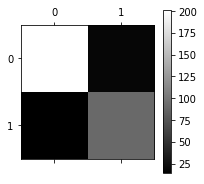

Confusion Matrix of Class 'h'
[[266  21]
 [  3  35]]

Accuracy of SGD Model on Class 'h': 74.4681%


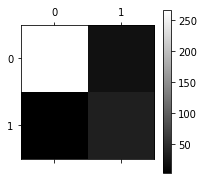

Confusion Matrix of Class 'o'
[[261  18]
 [  9  37]]

Accuracy of SGD Model on Class 'o': 73.2673%


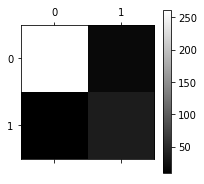

Confusion Matrix of Class 's'
[[183   6]
 [ 86  50]]

Accuracy of SGD Model on Class 's': 52.0833%


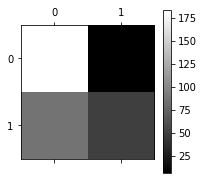

In [36]:
for index, ac in enumerate(class_predict):
    print("Confusion Matrix of Class '%s'" % order[index])
    y_test_class = test_classes[index]
    Y_test = ac
    
    conf = confusion_matrix(y_test_class, Y_test)
    print(conf)
    
    print("\nAccuracy of SGD Model on Class '%s': %.4f%%" % (order[index], f1_score(Y_test, y_test_class)*100))
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf, cmap=plt.cm.gray)
    fig.colorbar(cax)
    plt.show()

### 5.3 Conclusion
We find that the accuracy of the prediction of a One vs All SGD ranges between 70.15% and 93.85% accuracy on the testing data over the different classes, with the o-class interestingly performing the best despite its low instance count in the data. This could be cause by poor data quality of the other classes.

## 6. Run Multi-Class LogisticRegression 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

log = LogisticRegression(random_state=42, solver='lbfgs', multi_class="multinomial", C=16).fit(X_train_scaled, y_train)
Y_test_predict = log.predict(X_test_scaled)
logistic_cross_val = cross_val_score(log, X_test_scaled, y_test_copy, cv=3, scoring='accuracy')

### 6.1 Selection of optimal Logistic Parameters
Using GridCV as a way to search for optimal parameters it was found that it could achieve as high as 91% accuracy on the training data. However, the accuracy score was only determined to be 79.7% by using GridSearchCV parameters such as `C` to find that C=16 achieved the highest performance on the testing set.

### 6.2 Analyse and Visualise the Result of the Logistic Regression Prediction
Analysis looks at:
- Confusion Matrix
- Accuracy of Prediction

Visualise the Confusion Matrix

Confusion Matrix of Logistic Model:
[[93  2  6  4]
 [ 0 36  0  2]
 [12  0 34  0]
 [12 28  0 96]]
0.9296135845975543
0.8445087885735367

Accuracy of Softmax Logistic Model: 78.1891%


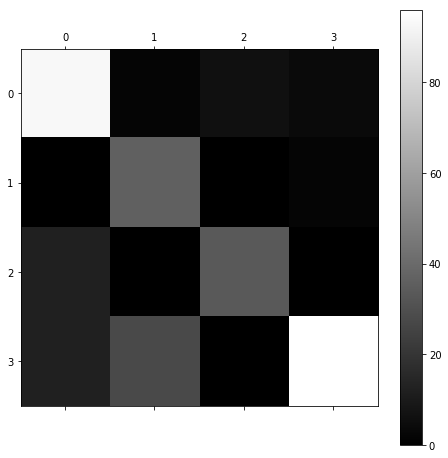

In [46]:
conf = confusion_matrix(y_test_copy, Y_test_predict)
print("Confusion Matrix of Logistic Model:")
print(conf)

y_cross_predict = cross_val_predict(log, X_train_scaled, y_train, cv=3)
print(np.mean(f1_score(y_train, y_cross_predict, average=None)))

y_cross_predict_test = cross_val_predict(log, X_test_scaled, y_test_copy, cv=3)
print(np.mean(f1_score(y_test_copy, y_cross_predict_test, average=None)))

print("\nAccuracy of Softmax Logistic Model: %.4f%%" % (np.mean(f1_score(y_test_copy, Y_test_predict, average=None)*100)))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(conf, cmap=plt.cm.gray)
fig.colorbar(cax)
plt.show()

From the above results we can see that the accuracy of the Softmax Logistic Regression on the test data only achieves a maximum accuracy of 79.6923%.

## 7. Comparison of Both Models
- Look at the Cross Validation Results of each Model

### 7.1 Cross Validation Box Plot

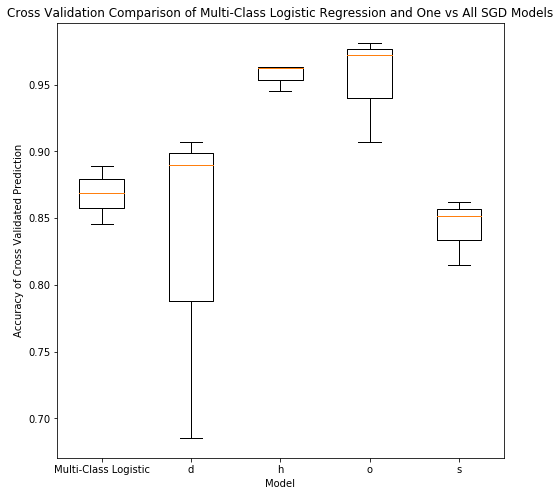

In [47]:
plt.figure(figsize=(8,8))
plt.boxplot([logistic_cross_val]+sgd_cross_val, labels=['Multi-Class Logistic']+order)
plt.title("Cross Validation Comparison of Multi-Class Logistic Regression and One vs All SGD Models")
plt.ylabel("Accuracy of Cross Validated Prediction")
plt.xlabel("Model")
plt.show()

### 7.3 Best Model?
From the above testing we have applied two different multi-label classification methods to the data and have determined their confusion matricies. These results demonstrate that the SGDClassifier is particularly accurate in its predictions of the `h` and `o` classes as seen by their high averages and little variability. Whilst its prediction of the `d` and `s` classes are much less accurate due to their larger range and lower mean.
Comparatively the Logistic Regression model achieves a mean of nearly 87% and has a small range.
Based on these results it is likely that for a consistent classification you may choose the Logistic Regression model, whilst for higher accuracy predictions the SGD Model will likely outperform the Logistic Model.

## 8. Conclusion
From these results it appears that the SGDClassifier resulted in the best model and is the best choice based on the testing data. With further data analysis and cleaning of the class `s` results it is possible that we could improve the accuracy of the model even further.